# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [38]:
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [39]:
train = pd.read_csv('Bank-data.csv')

In [41]:
train.drop('Unnamed: 0', axis=1, inplace=True)

In [42]:
train['y'] = train['y'].map({'yes': 1, 'no': 0})

### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [45]:
y_train = train['y']
x1 = train['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [46]:
X_train = sm.add_constant(x1)
reg_log = sm.Logit(y_train, X_train)
results_log = reg_log.fit()
results_log.summary()

/home/igobarros/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                  0.2121
Time:                        22:29:45   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

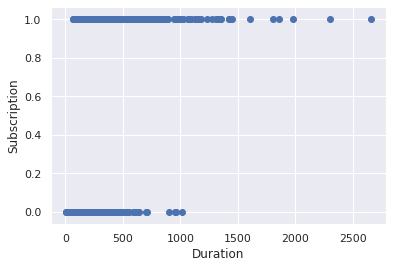

In [48]:
plt.scatter(x1, y_train, color='C0')
plt.xlabel('Duration')
plt.ylabel('Subscription')
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [50]:
estimators = ['interest_rate', 'march', 'credit', 'previous', 'duration']
x1 = train[estimators]

In [51]:
X_train = sm.add_constant(x1)
reg_log = sm.Logit(y_train, X_train)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                  0.5143
Time:                        22:37:03   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [52]:
def confusion_matrix(data, actual_values, model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins = np.array([0, 0.5, 1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [54]:
confusion_matrix(X_train, y_train, results_log)

(array([[218.,  41.],
        [ 30., 229.]]), 0.862934362934363)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [55]:
test = pd.read_csv('Bank-data-testing.csv')

In [57]:
test.drop('Unnamed: 0', axis=1, inplace=True)
test['y'] = test['y'].map({'yes': 1, 'no': 0})

### Declare the dependent and the independent variables

In [58]:
y_test = test['y']
x1 = test[estimators]

In [59]:
X_test = sm.add_constant(x1)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [60]:
confusion_matrix(X_test, y_test, results_log)

(array([[93., 18.],
        [13., 98.]]), 0.8603603603603603)

In [61]:
confusion_matrix(X_train, y_train, results_log)

(array([[218.,  41.],
        [ 30., 229.]]), 0.862934362934363)